# Intrusion Detection System for IoT Devices

Write short note here...

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Normalizing Data
6. Handling Imbalanced Data
7. Training the data
8. Comparision of Model
9. Conclusion

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

In [2]:
# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# saving and loading trained model
import pickle   
from os import path

In [4]:
# importing required libraries for normalizing data
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [5]:
# importing dataset for classification report
from sklearn import metrics 
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

# Binary Classification

write short note here...

# 1. Loading the data:

write short note here...

In [6]:
# Loading dataset into dataframe

df = pd.read_csv("BoTNeTIoT-L01-v2.csv") # 0 is an attack sample, 1 is a normal sample
df.head(10) # To display for rows of data entry

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,0.000000e+00,98.000000,...,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,1.348699e-06,138.592929,...,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,0.000000e+00,114.856432,...,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,0.000000e+00,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
5,5.902539,80.383706,1.558026e+02,5.902539,80.383706,1.558026e+02,2.999997,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
6,613.818538,74.095096,2.659110e+00,613.818538,74.095096,2.659110e+00,610.152839,74.0,3.814697e-06,95.268043,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
7,614.778927,74.094941,2.654800e+00,614.778927,74.094941,2.654800e+00,611.113465,74.0,3.814697e-06,95.268043,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
8,615.618170,74.094787,2.650502e+00,615.618170,74.094787,2.650502e+00,611.953666,74.0,3.568323e-06,95.268043,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
9,616.596022,74.094633,2.646218e+00,616.596022,74.094633,2.646218e+00,612.931650,74.0,3.693565e-06,95.268043,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0


# 2. Familiarizing with data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [7]:
len(df)

7062606

In [8]:
# shape of the dataframe

df.shape

(7062606, 27)

In [9]:
# listing the features of the dataframe

df.columns

Index(['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
       'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_weight',
       'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius',
       'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_weight',
       'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight',
       'HpHp_L0.1_mean', 'HpHp_L0.1_std', 'HpHp_L0.1_magnitude',
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'Device_Name', 'Attack', 'Attack_subType', 'label'],
      dtype='object')

In [10]:
df["Attack"].unique()

array(['gafgyt', 'mirai', 'Normal'], dtype=object)

In [ ]:
# Pie chart distribution of the attacks in the dataset
df["Attack"].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.title("Pie chart distribution of the attacks in the dataset\n")
plt.show()

In [11]:
df["Attack_subType"].unique()

array(['combo', 'junk', 'scan', 'tcp', 'udp', 'ack', 'syn', 'udpplain',
       'Normal'], dtype=object)

In [ ]:
# Pie chart distribution of all attack subtypes in the dataset
df["Attack_subType"].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.title("Pie chart distribution of all attack subtypes in the dataset\n")
plt.show()

In [12]:
df["Device_Name"].unique()

array(['Danmini_Doorbell', 'Ecobee_Thermostat', 'Ennio_Doorbell',
       'Philips_B120N10_Baby_Monitor',
       'Provision_PT_737E_Security_Camera',
       'Provision_PT_838_Security_Camera', 'Samsung_SNH_1011_N_Webcam',
       'SimpleHome_XCS7_1002_WHT_Security_Camera',
       'SimpleHome_XCS7_1003_WHT_Security_Camera'], dtype=object)

In [ ]:
# Pie chart distribution of all devices in the dataset
df["Device_Name"].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.title("Pie chart distribution of all devices in the dataset\n")
plt.show()

In [13]:
# count the number of empty (NaN, NAN, na) values in each column
df.isna().sum()

MI_dir_L0.1_weight      0
MI_dir_L0.1_mean        0
MI_dir_L0.1_variance    0
H_L0.1_weight           0
H_L0.1_mean             0
H_L0.1_variance         0
HH_L0.1_weight          0
HH_L0.1_mean            0
HH_L0.1_std             0
HH_L0.1_magnitude       0
HH_L0.1_radius          0
HH_L0.1_covariance      0
HH_L0.1_pcc             0
HH_jit_L0.1_weight      0
HH_jit_L0.1_mean        0
HH_jit_L0.1_variance    0
HpHp_L0.1_weight        0
HpHp_L0.1_mean          0
HpHp_L0.1_std           0
HpHp_L0.1_magnitude     0
HpHp_L0.1_radius        0
HpHp_L0.1_covariance    0
HpHp_L0.1_pcc           0
Device_Name             0
Attack                  0
Attack_subType          0
label                   0
dtype: int64

In [14]:
#Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062606 entries, 0 to 7062605
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MI_dir_L0.1_weight    float64
 1   MI_dir_L0.1_mean      float64
 2   MI_dir_L0.1_variance  float64
 3   H_L0.1_weight         float64
 4   H_L0.1_mean           float64
 5   H_L0.1_variance       float64
 6   HH_L0.1_weight        float64
 7   HH_L0.1_mean          float64
 8   HH_L0.1_std           float64
 9   HH_L0.1_magnitude     float64
 10  HH_L0.1_radius        float64
 11  HH_L0.1_covariance    float64
 12  HH_L0.1_pcc           float64
 13  HH_jit_L0.1_weight    float64
 14  HH_jit_L0.1_mean      float64
 15  HH_jit_L0.1_variance  float64
 16  HpHp_L0.1_weight      float64
 17  HpHp_L0.1_mean        float64
 18  HpHp_L0.1_std         float64
 19  HpHp_L0.1_magnitude   float64
 20  HpHp_L0.1_radius      float64
 21  HpHp_L0.1_covariance  float64
 22  HpHp_L0.1_pcc         float64
 23  Device_

In [15]:
# nunique value in columns
df.nunique()

MI_dir_L0.1_weight      2276268
MI_dir_L0.1_mean        2265915
MI_dir_L0.1_variance    2266031
H_L0.1_weight           2276383
H_L0.1_mean             2266034
H_L0.1_variance         2266175
HH_L0.1_weight          1530792
HH_L0.1_mean            1368526
HH_L0.1_std             1392808
HH_L0.1_magnitude       1369829
HH_L0.1_radius          1383985
HH_L0.1_covariance       454133
HH_L0.1_pcc              431687
HH_jit_L0.1_weight      1530792
HH_jit_L0.1_mean        1997489
HH_jit_L0.1_variance    1507219
HpHp_L0.1_weight         666797
HpHp_L0.1_mean           223133
HpHp_L0.1_std            256578
HpHp_L0.1_magnitude      264999
HpHp_L0.1_radius         273714
HpHp_L0.1_covariance     215749
HpHp_L0.1_pcc            194141
Device_Name                   9
Attack                        3
Attack_subType                9
label                         2
dtype: int64

In [16]:
# Drop all columns with missing values
df = df.dropna(axis = 1)

In [17]:
# Feature Extraction
df = df.drop(["Device_Name", "Attack_subType"], axis = 1)

In [18]:
# check for duplicate rows
df_duplicates = df.duplicated()

In [19]:
len(df)

7062606

In [20]:
# print the duplicated rows
df_duplicate_rows = df[df_duplicates]
print(df_duplicate_rows)

         MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
118641             1.000000         60.000000               0.00000   
118646             1.000000         60.000000               0.00000   
118650             1.000000         60.000000               0.00000   
118653             1.000000         60.000000               0.00000   
118658             1.000000         60.000000               0.00000   
...                     ...               ...                   ...   
7062601            2.937269        217.763487           17706.82364   
7062602            1.730254        282.630543           10545.88790   
7062603            2.730251        299.980395            7204.11662   
7062604            2.882414        216.723647           17753.08315   
7062605            2.032574        154.377267           13032.48760   

         H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  HH_L0.1_weight  \
118641        1.000000    60.000000          0.00000        1.000000   
118

In [21]:
# remove duplicates and keep the first occurence
df_no_duplicates = df.drop_duplicates()
df = df_no_duplicates

In [22]:
len(df)

2426574

In [23]:
df.shape

(2426574, 25)

In [24]:
df.dtypes

MI_dir_L0.1_weight      float64
MI_dir_L0.1_mean        float64
MI_dir_L0.1_variance    float64
H_L0.1_weight           float64
H_L0.1_mean             float64
H_L0.1_variance         float64
HH_L0.1_weight          float64
HH_L0.1_mean            float64
HH_L0.1_std             float64
HH_L0.1_magnitude       float64
HH_L0.1_radius          float64
HH_L0.1_covariance      float64
HH_L0.1_pcc             float64
HH_jit_L0.1_weight      float64
HH_jit_L0.1_mean        float64
HH_jit_L0.1_variance    float64
HpHp_L0.1_weight        float64
HpHp_L0.1_mean          float64
HpHp_L0.1_std           float64
HpHp_L0.1_magnitude     float64
HpHp_L0.1_radius        float64
HpHp_L0.1_covariance    float64
HpHp_L0.1_pcc           float64
Attack                   object
label                     int64
dtype: object

In [25]:
df.head(10)

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,0.000000e+00,98.000000,...,0.000000e+00,1.00000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,gafgyt,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,1.348699e-06,138.592929,...,5.662344e+17,1.93164,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,gafgyt,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,0.000000e+00,114.856432,...,0.000000e+00,1.00000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,gafgyt,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,0.000000e+00,74.000000,...,0.000000e+00,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gafgyt,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,9.536743e-07,74.000000,...,5.669445e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gafgyt,0
5,5.902539,80.383706,1.558026e+02,5.902539,80.383706,1.558026e+02,2.999997,74.0,9.536743e-07,74.000000,...,5.039505e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gafgyt,0
6,613.818538,74.095096,2.659110e+00,613.818538,74.095096,2.659110e+00,610.152839,74.0,3.814697e-06,95.268043,...,3.435392e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gafgyt,0
7,614.778927,74.094941,2.654800e+00,614.778927,74.094941,2.654800e+00,611.113465,74.0,3.814697e-06,95.268043,...,3.429779e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gafgyt,0
8,615.618170,74.094787,2.650502e+00,615.618170,74.094787,2.650502e+00,611.953666,74.0,3.568323e-06,95.268043,...,3.424183e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gafgyt,0
9,616.596022,74.094633,2.646218e+00,616.596022,74.094633,2.646218e+00,612.931650,74.0,3.693565e-06,95.268043,...,3.418605e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,gafgyt,0


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MI_dir_L0.1_weight,2426574.0,3.610199e+03,2.699672e+03,1.000000,23.532729,3865.926881,6.339465e+03,8.946997e+03
MI_dir_L0.1_mean,2426574.0,2.176135e+02,1.552091e+02,60.000000,69.399990,134.912178,3.821550e+02,1.401994e+03
MI_dir_L0.1_variance,2426574.0,2.644564e+04,2.826344e+04,0.000000,42.937436,11168.076300,5.520453e+04,4.520011e+05
H_L0.1_weight,2426574.0,3.610199e+03,2.699672e+03,1.000000,23.532729,3865.926881,6.339465e+03,8.946997e+03
H_L0.1_mean,2426574.0,2.176138e+02,1.552092e+02,60.000000,69.399990,134.912178,3.821550e+02,1.401994e+03
H_L0.1_variance,2426574.0,2.644569e+04,2.826340e+04,0.000000,42.939476,11169.045115,5.520453e+04,4.520011e+05
HH_L0.1_weight,2426574.0,1.676056e+03,2.195495e+03,1.000000,1.000000,3.503137,4.128297e+03,7.944987e+03
HH_L0.1_mean,2426574.0,2.170561e+02,2.218185e+02,60.000000,60.000000,73.997690,5.538333e+02,1.470000e+03
HH_L0.1_std,2426574.0,9.479734e+00,3.522442e+01,0.000000,0.000000,0.167569,6.785243e+00,6.784580e+02
HH_L0.1_magnitude,2426574.0,2.302873e+02,2.222759e+02,60.000000,60.000000,95.262788,5.538395e+02,1.470000e+03


In [27]:
# checking the length of the dataset
len(df)

2426574

# 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

In [28]:
# # pairplot for particular features

# df = bin_df[['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance','H_L0.1_weight','H_L0.1_mean','label']]
# sns.pairplot(data = df, hue = "label", corner = True);

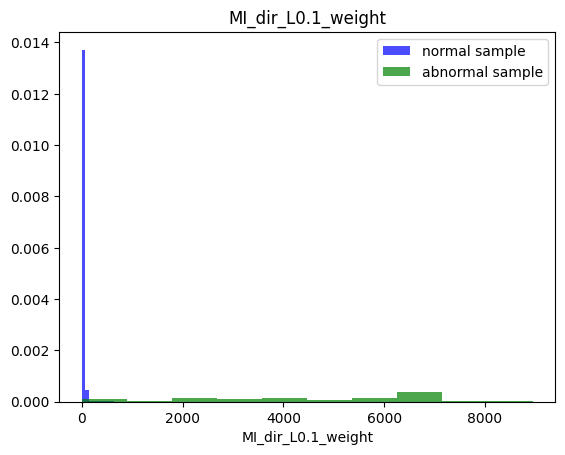

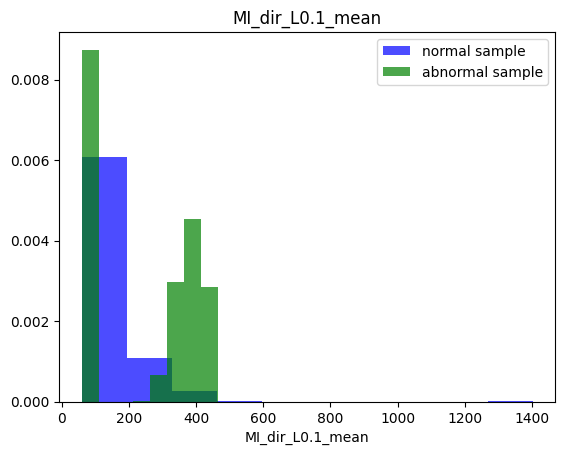

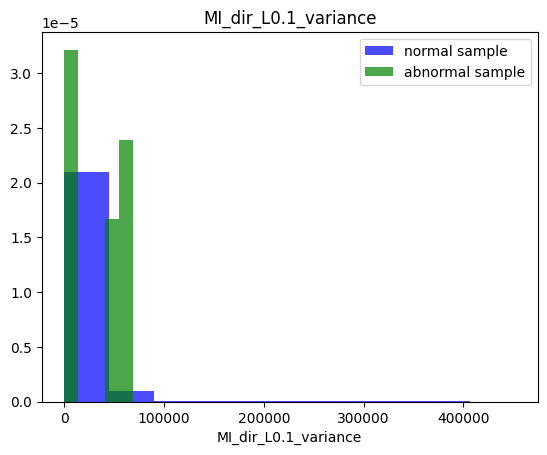

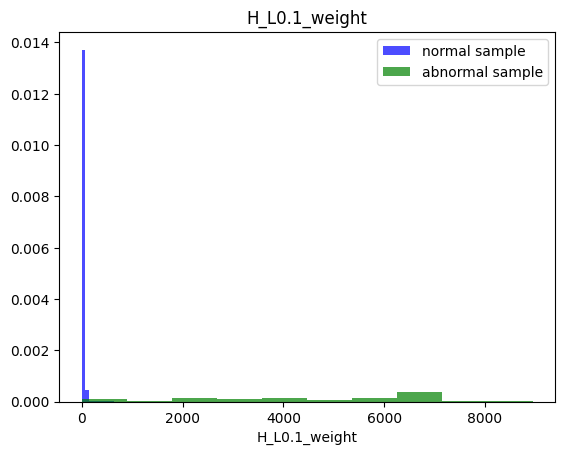

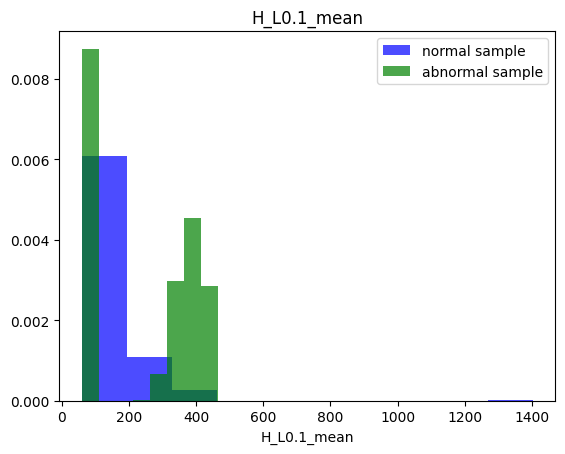

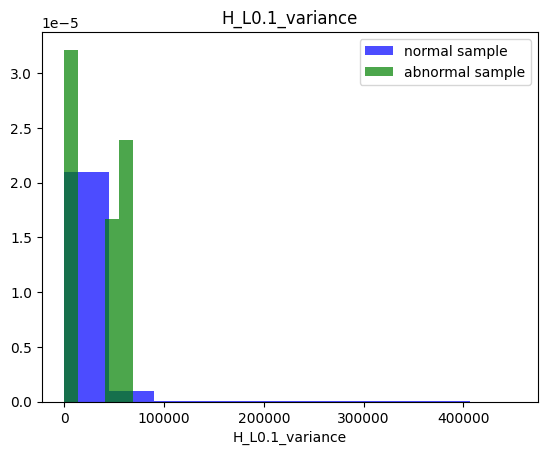

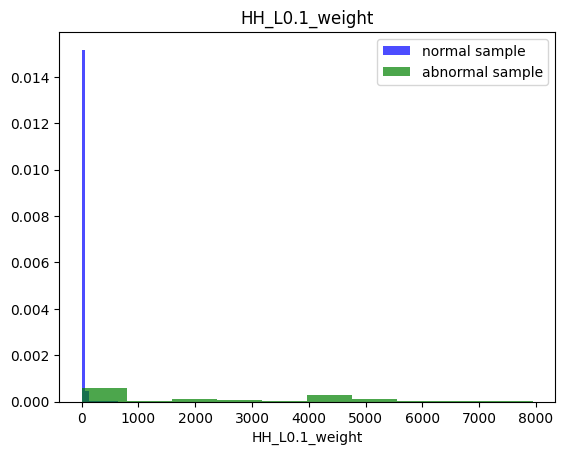

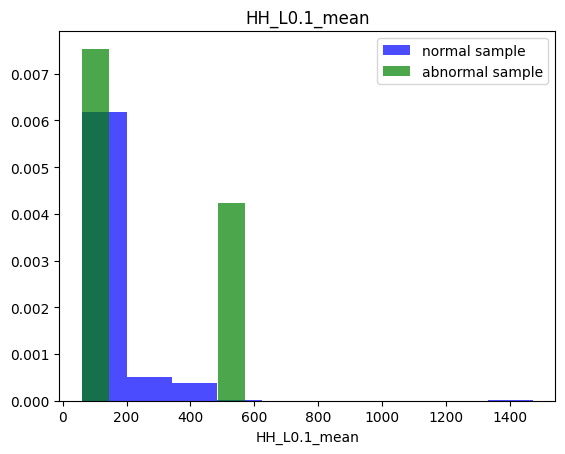

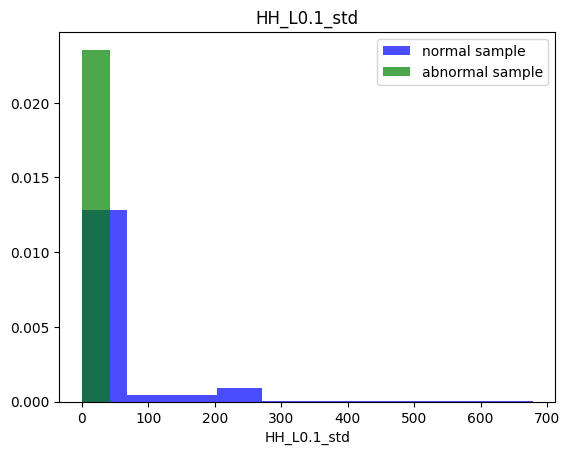

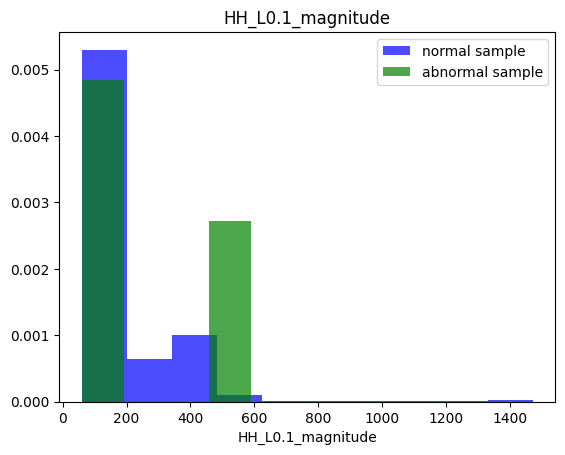

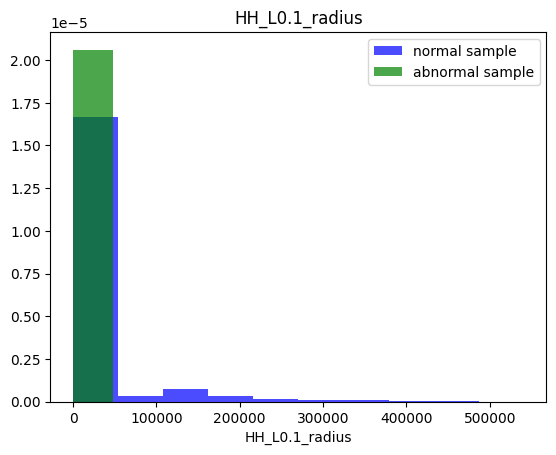

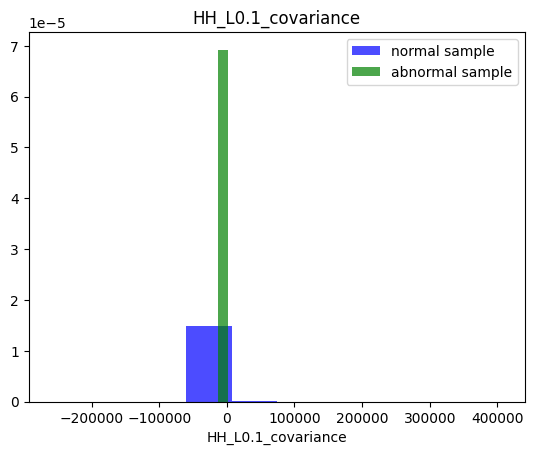

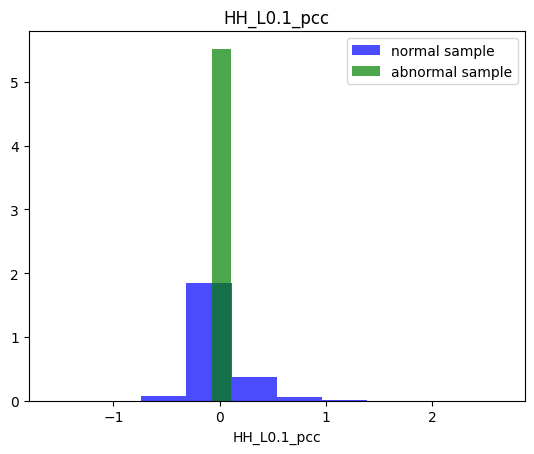

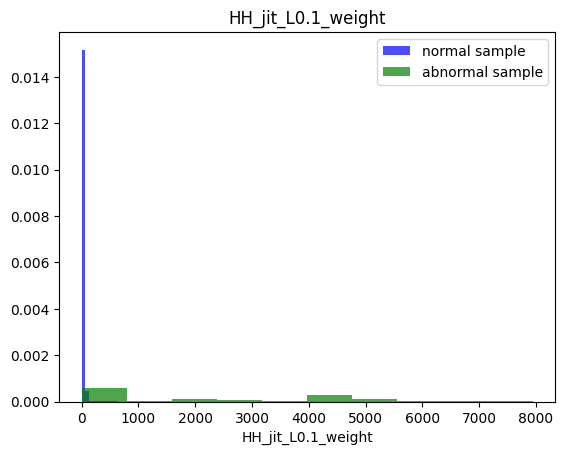

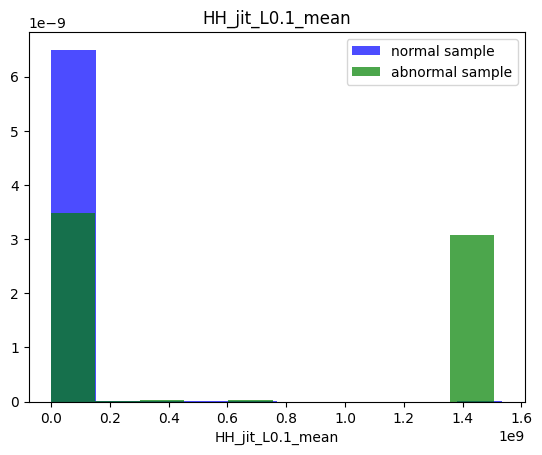

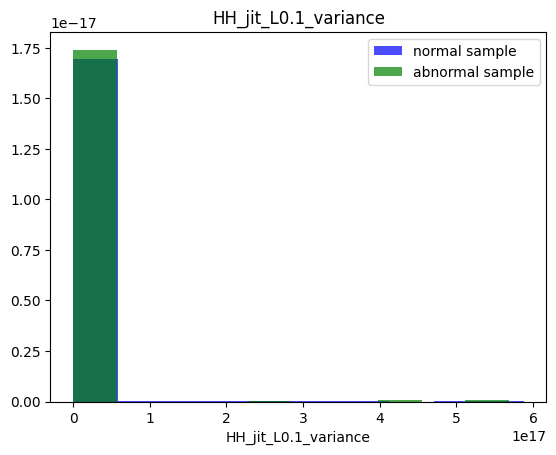

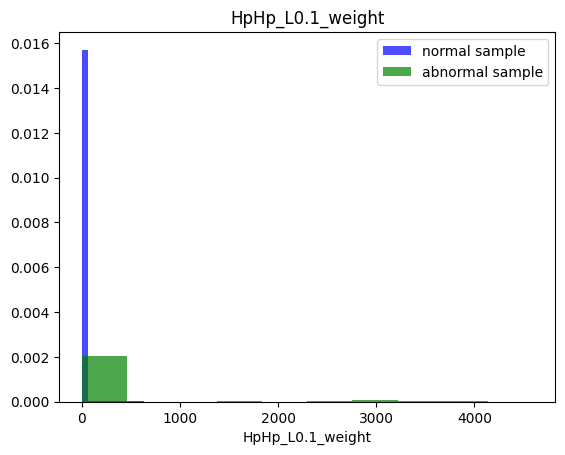

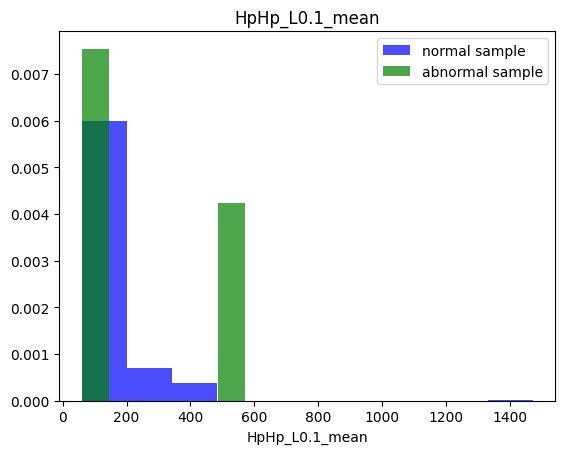

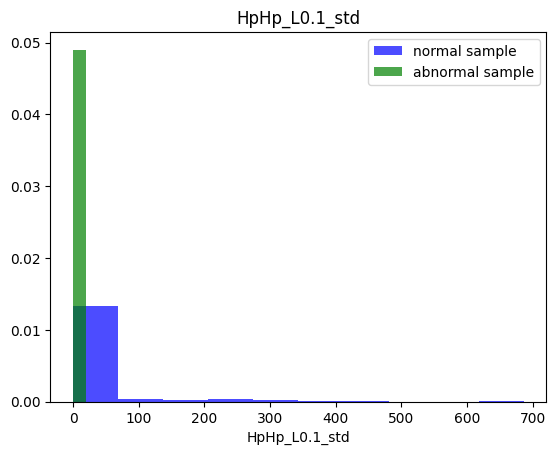

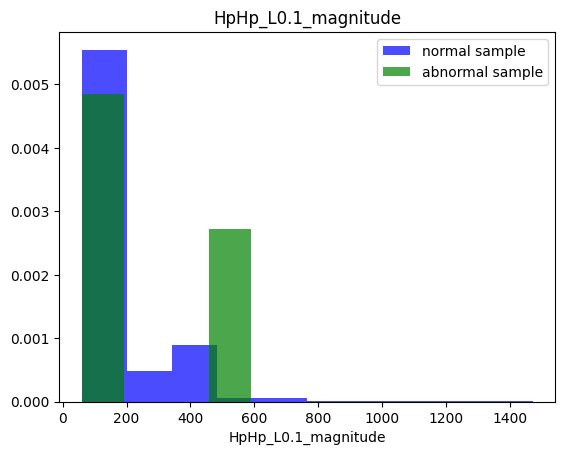

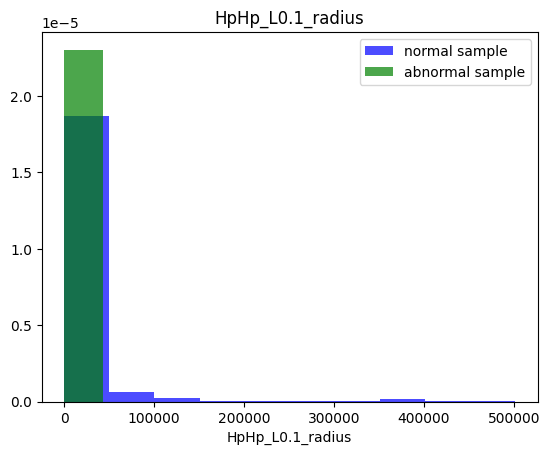

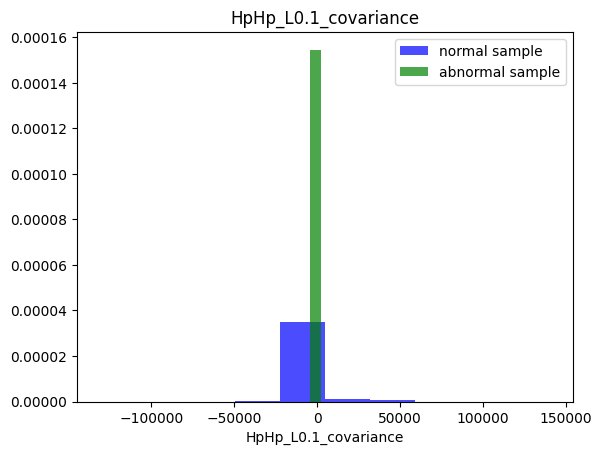

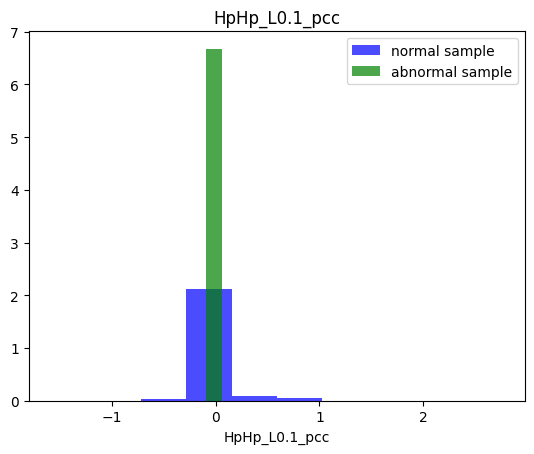

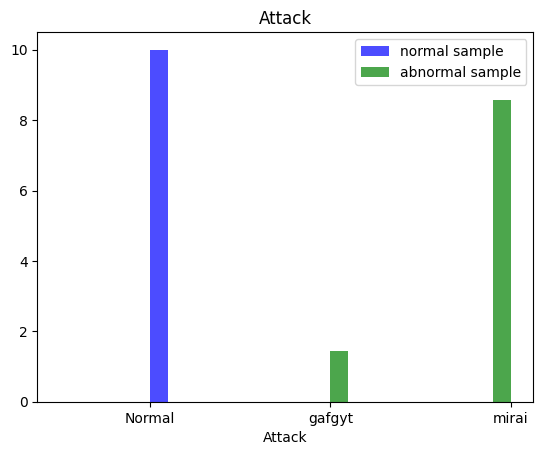

In [29]:
for label in df.columns[:-1]:
    plt.hist(df[df["label"] == 1][label], color = "blue", label = "normal sample", alpha = 0.7, density = True)
    plt.hist(df[df["label"] == 0][label], color = "green", label = "abnormal sample", alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("")
    plt.xlabel(label)
    plt.legend()
    plt.show()


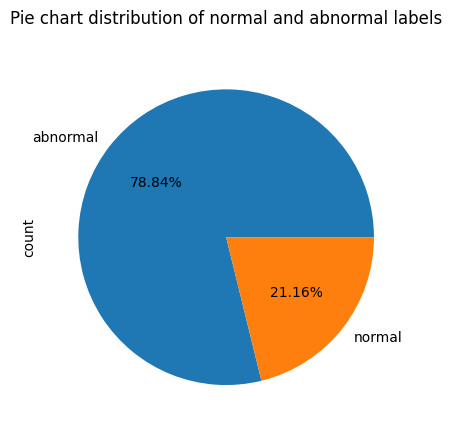

In [30]:
# Pie chart distribution of normal and abnormal labels
binary_labels = ["abnormal", "normal"]
df['label'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', labels = binary_labels)
plt.title("Pie chart distribution of normal and abnormal labels\n")
plt.show()

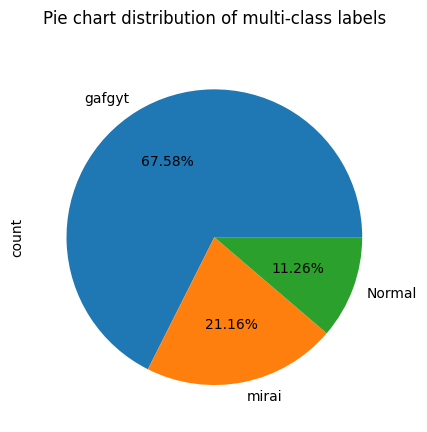

In [31]:
# Pie chart distribution of normal and abnormal labels
multi_class_labels = ["gafgyt", "mirai", "Normal"]
df["Attack"].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', labels = multi_class_labels)
plt.title("Pie chart distribution of multi-class labels\n")
plt.show()

In [32]:
def multi_class_data(df):
    # Create a dictionary to map categories to numbers
    category_mapping = {
        'Normal': 1,
        'mirai': 2,
        'gafgyt': 3,
        }

    # Apply the mapping to create a new column with numerical representation
    df["Attack"] = df["Attack"].replace(category_mapping)

    return df

In [33]:
df = multi_class_data(df)

In [34]:
df.head(10)

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,0.000000e+00,98.000000,...,0.000000e+00,1.00000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,3,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,1.348699e-06,138.592929,...,5.662344e+17,1.93164,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,3,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,0.000000e+00,114.856432,...,0.000000e+00,1.00000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,3,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,0.000000e+00,74.000000,...,0.000000e+00,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,9.536743e-07,74.000000,...,5.669445e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
5,5.902539,80.383706,1.558026e+02,5.902539,80.383706,1.558026e+02,2.999997,74.0,9.536743e-07,74.000000,...,5.039505e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
6,613.818538,74.095096,2.659110e+00,613.818538,74.095096,2.659110e+00,610.152839,74.0,3.814697e-06,95.268043,...,3.435392e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
7,614.778927,74.094941,2.654800e+00,614.778927,74.094941,2.654800e+00,611.113465,74.0,3.814697e-06,95.268043,...,3.429779e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
8,615.618170,74.094787,2.650502e+00,615.618170,74.094787,2.650502e+00,611.953666,74.0,3.568323e-06,95.268043,...,3.424183e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
9,616.596022,74.094633,2.646218e+00,616.596022,74.094633,2.646218e+00,612.931650,74.0,3.693565e-06,95.268043,...,3.418605e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0


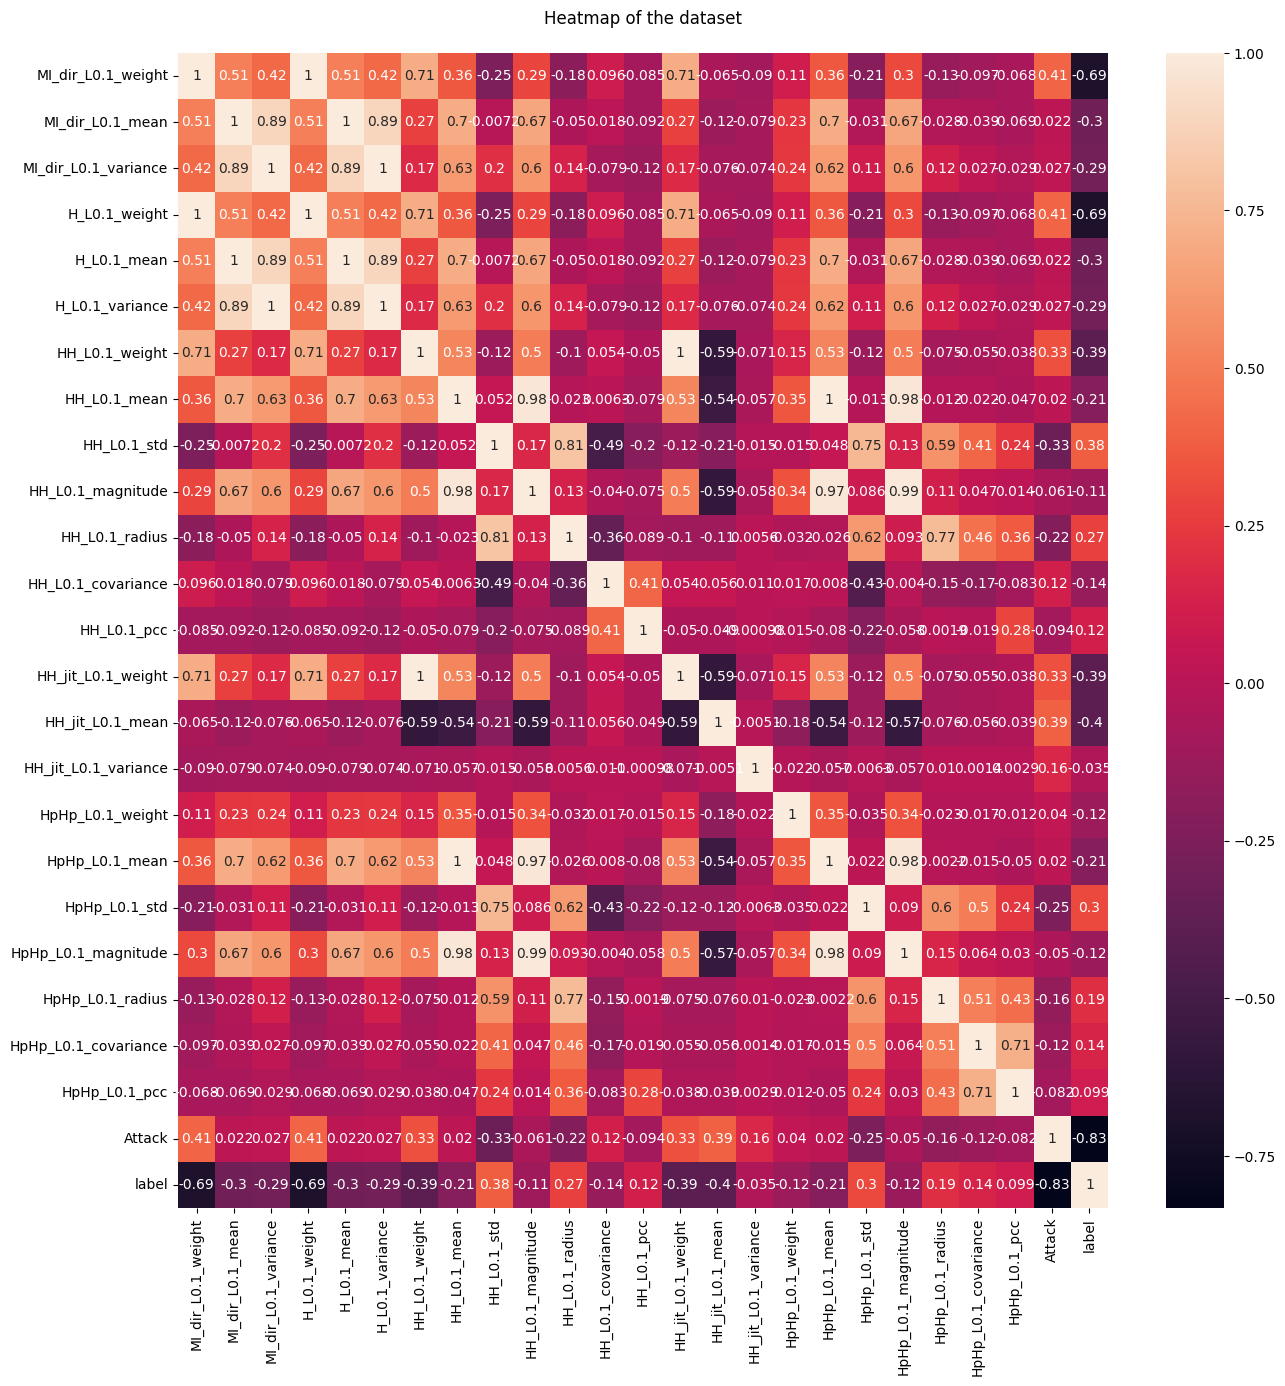

In [35]:
# correlation heatmap

plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)
plt.title("Heatmap of the dataset\n")
plt.show()

In [36]:
# splitting Data into X and Y Plane for binary and multi-class classification
bi_x = df.drop(["label"], axis = 1)    # feature matrix
bi_y = df["label"]   # target vector

mul_x = df.drop(["Attack"], axis = 1)    # feature matrix
mul_y = df["Attack"]   # target vector

# 5. Normalizing Dataset
Normalizing the features to a common scale to avoid bias due to different measurement units.

In [37]:
df.head(10)

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,0.000000e+00,98.000000,...,0.000000e+00,1.00000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,3,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,1.348699e-06,138.592929,...,5.662344e+17,1.93164,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,3,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,0.000000e+00,114.856432,...,0.000000e+00,1.00000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,3,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,0.000000e+00,74.000000,...,0.000000e+00,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,9.536743e-07,74.000000,...,5.669445e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
5,5.902539,80.383706,1.558026e+02,5.902539,80.383706,1.558026e+02,2.999997,74.0,9.536743e-07,74.000000,...,5.039505e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
6,613.818538,74.095096,2.659110e+00,613.818538,74.095096,2.659110e+00,610.152839,74.0,3.814697e-06,95.268043,...,3.435392e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
7,614.778927,74.094941,2.654800e+00,614.778927,74.094941,2.654800e+00,611.113465,74.0,3.814697e-06,95.268043,...,3.429779e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
8,615.618170,74.094787,2.650502e+00,615.618170,74.094787,2.650502e+00,611.953666,74.0,3.568323e-06,95.268043,...,3.424183e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0
9,616.596022,74.094633,2.646218e+00,616.596022,74.094633,2.646218e+00,612.931650,74.0,3.693565e-06,95.268043,...,3.418605e+15,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,3,0


In [38]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(df)

In [39]:
df = normalized_data

In [40]:
# col = df.select_dtypes(include = "number").columns

In [41]:
# scaler = MinMaxScaler()
# def normalization(df, col):
#   for i in col:
#     arr = df[i]
#     arr = np.array(arr)
#     df[i] = scaler.fit_transform(arr.reshape(len(arr), 1))
#   return df

In [42]:
# df = normalization(df.copy(), col)

In [43]:
df

array([[0.00000000e+00, 2.83160794e-02, 0.00000000e+00, ...,
        3.64942629e-01, 1.00000000e+00, 0.00000000e+00],
       [1.04140395e-04, 2.83160794e-02, 4.02430312e-18, ...,
        3.64942629e-01, 1.00000000e+00, 0.00000000e+00],
       [2.12863085e-04, 2.01057207e-02, 5.11463726e-04, ...,
        3.64942629e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [8.31575814e-05, 1.64797416e-01, 2.38980733e-02, ...,
        3.64942629e-01, 0.00000000e+00, 1.00000000e+00],
       [1.94939164e-04, 1.78061546e-01, 1.64111198e-02, ...,
        3.64942629e-01, 0.00000000e+00, 1.00000000e+00],
       [2.12217471e-04, 1.16629172e-01, 3.92965387e-02, ...,
        3.64942629e-01, 0.00000000e+00, 1.00000000e+00]])

# Handling Imbalanced Data

In [44]:
!pip install -U imbalanced-learn

# Random Undersampling for binary classification

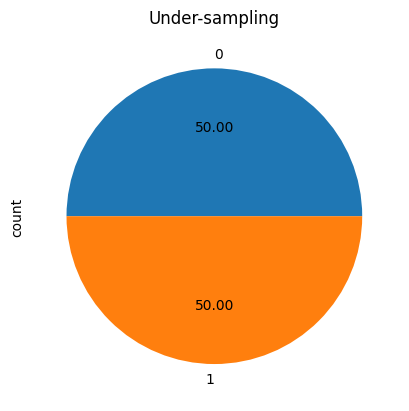

In [45]:
rus = RandomUnderSampler()
bi_x_res, bi_y_res = rus.fit_resample(bi_x, bi_y)
ax = bi_y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling")

In [46]:
# Class distribution
bi_y_res.value_counts()

label
0    513497
1    513497
Name: count, dtype: int64

# Random Oversampling for binary classification

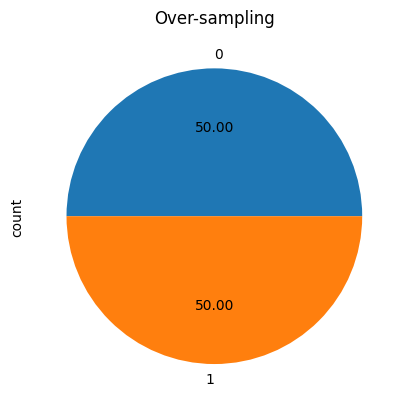

In [47]:
ros = RandomOverSampler()
bi_x_res, bi_y_res = ros.fit_resample(bi_x, bi_y)
ax = bi_y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Over-sampling")

In [48]:
# Class distribution
bi_y_res.value_counts()

label
0    1913077
1    1913077
Name: count, dtype: int64

# Random Undersampling for multi-class classification

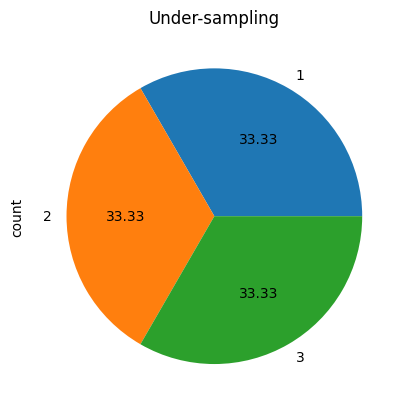

In [49]:
rus = RandomUnderSampler()
mul_x_res, mul_y_res = rus.fit_resample(mul_x, mul_y)
ax = mul_y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling")

In [50]:
# Class distribution
mul_y_res.value_counts()

Attack
1    273186
2    273186
3    273186
Name: count, dtype: int64

# Random Oversampling for multi-class classification

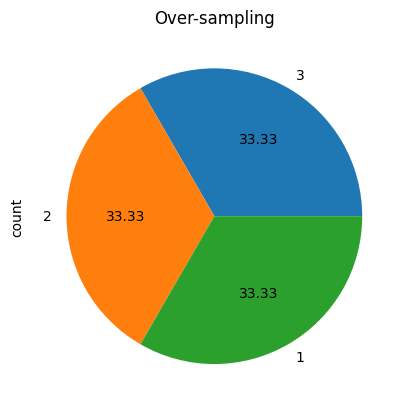

In [51]:
ros = RandomOverSampler()
mul_x_res, mul_y_res = ros.fit_resample(mul_x, mul_y)
ax = mul_y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Over-sampling")

In [52]:
# Class distribution
mul_y_res.value_counts()

Attack
3    1639891
2    1639891
1    1639891
Name: count, dtype: int64

# 4. Splitting the data:
The data is split into train & test sets, 70-30 split.

In [53]:
# splitting our dataset into 70% train & 30% test dataset for binary classification.

bi_x_train, bi_x_test, bi_y_train, bi_y_test = train_test_split(bi_x_res, bi_y_res, train_size = 0.7, test_size = 0.3, random_state = 42)
bi_x_train.shape, bi_x_test.shape, bi_y_train.shape, bi_y_test.shape

((2678307, 24), (1147847, 24), (2678307,), (1147847,))

In [54]:
# splitting our dataset into 70% train & 30% test dataset for multi-class classification.

mul_x_train, mul_x_test, mul_y_train, mul_y_test = train_test_split(mul_x_res, mul_y_res, train_size = 0.7, test_size = 0.3, random_state = 42)
mul_x_train.shape, mul_x_test.shape, mul_y_train.shape, mul_y_test.shape

((3443771, 24), (1475902, 24), (3443771,), (1475902,))

# 7. Modelling and Training the data:

write something here...

1. Random Forest
2. Gradient Boosting
3. Neural Network: Multilayer Perceptrons
4. k-Nearest Neighbors

write something here as well...

In [55]:
# Creating holders to store the model performance results for binary classification
ML_Model_bi = []
accuracy_bi = []
f1_score_bi = []
recall_bi = []
precision_bi = []

# function to call for storing the results
def storeResults_bi(model, a,b,c,d):
  ML_Model_bi.append(model)
  accuracy_bi.append(round(a, 3))
  f1_score_bi.append(round(b, 3))
  recall_bi.append(round(c, 3))
  precision_bi.append(round(d, 3))

In [56]:
# Creating holders to store the model performance results for multi-class classification
ML_Model_mul = []
accuracy_mul = []

# function to call for storing the results
def storeResults_mul(model, a):
  ML_Model_mul.append(model)
  accuracy_mul.append(round(a, 3))

# 7.1. Random Forests

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Random Forests Binary Classification

In [58]:
bi_rf_model = RandomForestClassifier( n_estimators = 100, max_depth = None, random_state = 42)
bi_rf_model = bi_rf_model.fit(bi_x_train, bi_y_train)

In [59]:
# Save the model to a file
with open('./Models/Binary_Classification/Random_Forests_model.pkl', 'wb') as f:
    pickle.dump(bi_rf_model, f)

# Load the model from the file
with open('./Models/Binary_Classification/Random_Forests_model.pkl', 'rb') as f:
    loaded_bi_rf_model = pickle.load(f)

In [60]:
# predicting the target value from the model for the samples

bi_x_train_pred = loaded_bi_rf_model.predict(bi_x_train)
bi_y_pred = loaded_bi_rf_model.predict(bi_x_test)

In [61]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_bi_rf_model_train = metrics.accuracy_score(bi_y_train, bi_x_train_pred)
acc_bi_rf_model_pred = metrics.accuracy_score(bi_y_test, bi_y_pred)
print("Random Forests Classifier : Accuracy on training Data for Binary Classification: {:.3f}%".format(acc_bi_rf_model_train * 100))
print("Random Forests Classifier : Accuracy on test Data for Binary Classification: {:.3f}%".format(acc_bi_rf_model_pred * 100))
print()

f1_score_bi_rf_model_train = metrics.f1_score(bi_y_train, bi_x_train_pred)
f1_score_bi_rf_model_pred = metrics.f1_score(bi_y_test, bi_y_pred)
print("Random Forests Classifier : f1_score on training Data for Binary Classification: {:.3f}%".format(f1_score_bi_rf_model_train * 100))
print("Random Forests Classifier : f1_score on test Data for Binary Classification: {:.3f}%".format(f1_score_bi_rf_model_pred * 100))
print()

recall_score_bi_rf_model_train = metrics.recall_score(bi_y_train, bi_x_train_pred)
recall_score_bi_rf_model_pred = metrics.recall_score(bi_y_test, bi_y_pred)
print("Random Forests Classifier : Recall on training Data for Binary Classification: {:.3f}%".format(recall_score_bi_rf_model_train  * 100))
print("Random Forests Classifier : Recall on test Data for Binary Classification: {:.3f}%".format(recall_score_bi_rf_model_pred * 100))
print()

precision_score_bi_rf_model_train = metrics.precision_score(bi_y_train, bi_x_train_pred)
precision_score_bi_rf_model_pred = metrics.precision_score(bi_y_test, bi_y_pred)
print("Random Forests Classifier : precision on training Data for Binary Classification: {:.3f}%".format(precision_score_bi_rf_model_train * 100))
print("Random Forests Classifier : precision on test Data for Binary Classification: {:.3f}%".format(precision_score_bi_rf_model_pred * 100))

Random Forests Classifier : Accuracy on training Data for Binary Classification: 100.000%
Random Forests Classifier : Accuracy on test Data for Binary Classification: 100.000%

Random Forests Classifier : f1_score on training Data for Binary Classification: 100.000%
Random Forests Classifier : f1_score on test Data for Binary Classification: 100.000%

Random Forests Classifier : Recall on training Data for Binary Classification: 100.000%
Random Forests Classifier : Recall on test Data for Binary Classification: 100.000%

Random Forests Classifier : precision on training Data for Binary Classification: 100.000%
Random Forests Classifier : precision on test Data for Binary Classification: 100.000%


In [62]:
print(classification_report(bi_y_test, bi_y_pred, target_names = binary_labels))

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00    573799
      normal       1.00      1.00      1.00    574048

    accuracy                           1.00   1147847
   macro avg       1.00      1.00      1.00   1147847
weighted avg       1.00      1.00      1.00   1147847



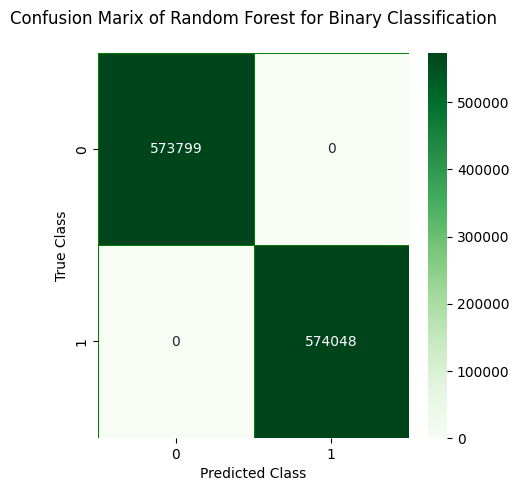

In [69]:
bi_rf_cm = confusion_matrix(bi_y_test, bi_y_pred)
cmap = 'Greens'
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(bi_rf_cm, annot = True, linewidth = 0.5, linecolor = "green", fmt = ".0f", ax = ax, cmap = cmap)
plt.title("Confusion Marix of Random Forest for Binary Classification\n")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

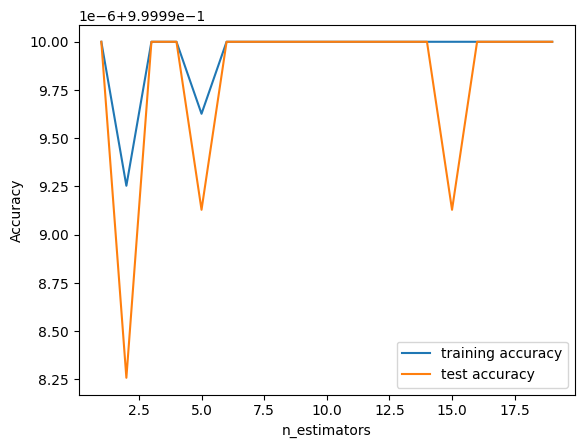

In [70]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators = n)

    forest_test.fit(bi_x_train, bi_y_train)

    # record training set accuracy
    training_accuracy.append(forest_test.score(bi_x_train, bi_y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(bi_x_test, bi_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize = None)
plt.plot(depth, training_accuracy, label = "training accuracy")
plt.plot(depth, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [71]:
# storing the results. The below mentioned order of parameter passing is important.

storeResults_bi('Random Forests Classifier', acc_bi_rf_model_pred, f1_score_bi_rf_model_pred,
            recall_score_bi_rf_model_pred, precision_score_bi_rf_model_pred)

# Random Forests Multi-class Classification

In [72]:
mul_rf_model = RandomForestClassifier( n_estimators = 100, max_depth = None, random_state = 42)
mul_rf_model = mul_rf_model.fit(mul_x_train, mul_y_train)

In [73]:
# Save the model to a file
with open('./Models/Multi-class_Classification/Random_Forests_model.pkl', 'wb') as f:
    pickle.dump(mul_rf_model, f)

# Load the model from the file
with open('./Models/Multi-class_Classification/Random_Forests_model.pkl', 'rb') as f:
    loaded_mul_rf_model = pickle.load(f)

In [74]:
# predicting the target value from the model for the samples

mul_x_train_pred = loaded_mul_rf_model.predict(mul_x_train)
mul_y_pred = loaded_mul_rf_model.predict(mul_x_test)

In [75]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_mul_rf_model_train = metrics.accuracy_score(mul_y_train, mul_x_train_pred)
acc_mul_rf_model_pred = metrics.accuracy_score(mul_y_test, mul_y_pred)
print("Random Forests Classifier : Accuracy on training Data for Multi-class Classification: {:.3f}%".format(acc_mul_rf_model_train * 100))
print("Random Forests Classifier : Accuracy on test Data for Multi-class Classification: {:.3f}%".format(acc_mul_rf_model_pred * 100))


Random Forests Classifier : Accuracy on training Data for Multi-class Classification: 100.000%
Random Forests Classifier : Accuracy on test Data for Multi-class Classification: 100.000%


In [76]:
print(classification_report(mul_y_test, mul_y_pred, target_names = multi_class_labels))

              precision    recall  f1-score   support

      gafgyt       1.00      1.00      1.00    492491
       mirai       1.00      1.00      1.00    491174
      Normal       1.00      1.00      1.00    492237

    accuracy                           1.00   1475902
   macro avg       1.00      1.00      1.00   1475902
weighted avg       1.00      1.00      1.00   1475902



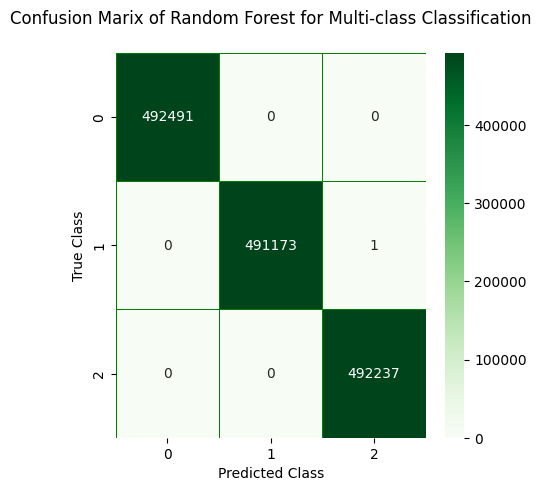

In [79]:
mul_rf_cm = confusion_matrix(mul_y_test, mul_y_pred)
cmap = 'Greens'
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(mul_rf_cm, annot = True, linewidth = 0.5, linecolor = "green", fmt = ".0f", ax = ax, cmap = cmap)
plt.title("Confusion Marix of Random Forest for Multi-class Classification\n")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

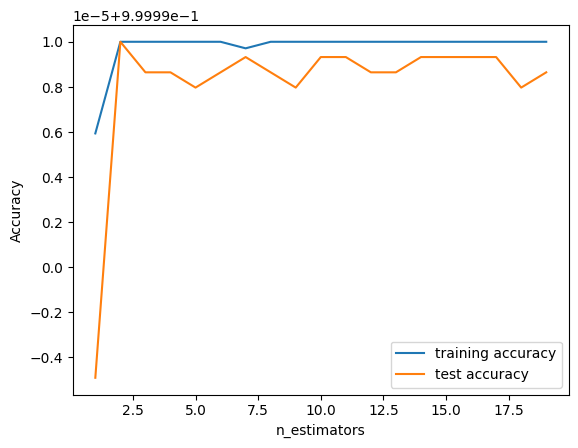

In [80]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators = n)

    forest_test.fit(mul_x_train, mul_y_train)

    # record training set accuracy
    training_accuracy.append(forest_test.score(mul_x_train, mul_y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(mul_x_test, mul_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize = None)
plt.plot(depth, training_accuracy, label = "training accuracy")
plt.plot(depth, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [81]:
# storing the results. The below mentioned order of parameter passing is important.

storeResults_mul('Random Forests Classifier', acc_mul_rf_model_pred)

# 7.2. Gradient Boosting
Binary Classification

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
# Initialize the gradient boosting model with 100 estimators

bi_gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.7)
bi_gb_model = bi_gb_model.fit(bi_x_train, bi_y_train)

In [84]:
# Save the model to a file
with open('./Models/Binary_Classification/Gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(bi_gb_model, f)

# Load the model from the file
with open('./Models/Binary_Classification/Gradient_boosting_model.pkl', 'rb') as f:
    loaded_bi_gb_model = pickle.load(f)

In [85]:
# predicting the target value from the model for the samples

bi_x_train_pred = loaded_bi_gb_model.predict(bi_x_train)
bi_y_pred = loaded_bi_gb_model.predict(bi_x_test)

In [86]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_bi_gb_model_train = metrics.accuracy_score(bi_y_train, bi_x_train_pred)
acc_bi_gb_model_pred = metrics.accuracy_score(bi_y_test, bi_y_pred)
print("Gradient Boosting : Accuracy on training Data for Binary Classification: {:.3f}%".format(acc_bi_gb_model_train * 100))
print("Gradient Boosting : Accuracy on test Data for Binary Classification: {:.3f}%".format(acc_bi_gb_model_pred * 100))
print()

f1_score_bi_gb_model_train = metrics.f1_score(bi_y_train, bi_x_train_pred)
f1_score_bi_gb_model_pred = metrics.f1_score(bi_y_test, bi_y_pred)
print("Gradient Boosting : f1_score on training Data for Binary Classification: {:.3f}%".format(f1_score_bi_gb_model_train * 100))
print("Gradient Boosting : f1_score on test Data for Binary Classification: {:.3f}%".format(f1_score_bi_gb_model_pred * 100))
print()

recall_score_bi_gb_model_train = metrics.recall_score(bi_y_train, bi_x_train_pred)
recall_score_bi_gb_model_pred = metrics.recall_score(bi_y_test, bi_y_pred)
print("Gradient Boosting : Recall on training Data for Binary Classification: {:.3f}%".format(recall_score_bi_gb_model_train  * 100))
print("Gradient Boosting : Recall on test Data for Binary Classification: {:.3f}%".format(recall_score_bi_gb_model_pred * 100))
print()

precision_score_bi_gb_model_train = metrics.precision_score(bi_y_train, bi_x_train_pred)
precision_score_bi_gb_model_pred = metrics.precision_score(bi_y_test, bi_y_pred)
print("Gradient Boosting : precision on training Data for Binary Classification: {:.3f}%".format(precision_score_bi_gb_model_train * 100))
print("Gradient Boosting : precision on test Data for Binary Classification: {:.3f}%".format(precision_score_bi_gb_model_pred * 100))

Gradient Boosting : Accuracy on training Data for Binary Classification: 100.000%
Gradient Boosting : Accuracy on test Data for Binary Classification: 100.000%

Gradient Boosting : f1_score on training Data for Binary Classification: 100.000%
Gradient Boosting : f1_score on test Data for Binary Classification: 100.000%

Gradient Boosting : Recall on training Data for Binary Classification: 100.000%
Gradient Boosting : Recall on test Data for Binary Classification: 100.000%

Gradient Boosting : precision on training Data for Binary Classification: 100.000%
Gradient Boosting : precision on test Data for Binary Classification: 100.000%


In [87]:
print(classification_report(bi_y_test, bi_y_pred, target_names = binary_labels))

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00    573799
      normal       1.00      1.00      1.00    574048

    accuracy                           1.00   1147847
   macro avg       1.00      1.00      1.00   1147847
weighted avg       1.00      1.00      1.00   1147847



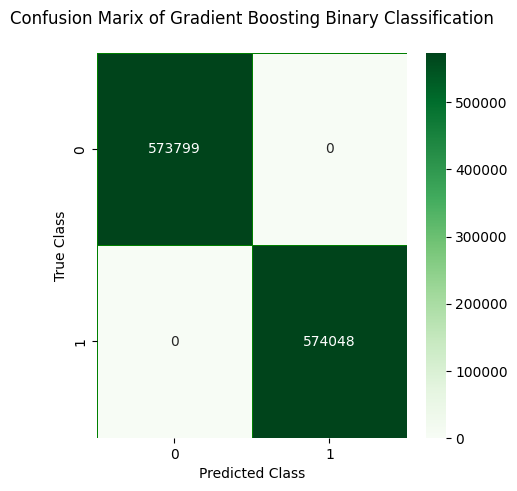

In [88]:
bi_gb_cm = confusion_matrix(bi_y_test, bi_y_pred)
cmap = 'Greens'
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(bi_gb_cm, annot = True, linewidth = 0.5, linecolor = "green", fmt = ".0f", ax = ax, cmap = cmap)
plt.title("Confusion Marix of Gradient Boosting Binary Classification\n")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

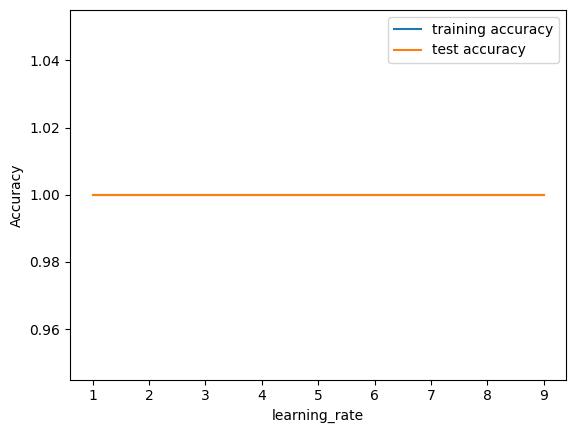

In [89]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    gbc_bi=  GradientBoostingClassifier(learning_rate = n*0.1)

    gbc_bi.fit(bi_x_train, bi_y_train)
    # record training set accuracy
    training_accuracy.append(gbc_bi.score(bi_x_train, bi_y_train))
    # record generalization accuracy
    test_accuracy.append(gbc_bi.score(bi_x_test, bi_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

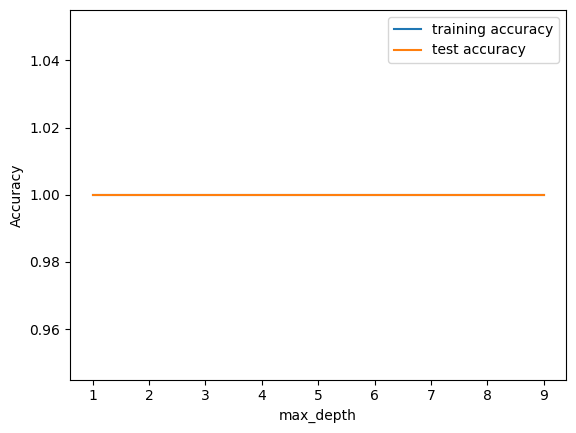

In [90]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    gbc_bi =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    gbc_bi.fit(bi_x_train, bi_y_train)
    # record training set accuracy
    training_accuracy.append(gbc_bi.score(bi_x_train, bi_y_train))
    # record generalization accuracy
    test_accuracy.append(gbc_bi.score(bi_x_test, bi_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [93]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults_bi('Gradient Boosting', acc_bi_gb_model_pred, f1_score_bi_gb_model_pred,
            recall_score_bi_gb_model_pred, precision_score_bi_gb_model_pred)

 
Multi-class Classification

In [95]:
# Initialize the gradient boosting model with 100 estimators

mul_gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.7)
mul_gb_model = mul_gb_model.fit(mul_x_train, mul_y_train)

In [96]:
# Save the model to a file
with open('./Models/Multi-class_Classification/Gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(mul_gb_model, f)

# Load the model from the file
with open('./Models/Multi-class_Classification/Gradient_boosting_model.pkl', 'rb') as f:
    loaded_mul_gb_model = pickle.load(f)

In [97]:
# predicting the target value from the model for the samples

mul_x_train_pred = loaded_mul_gb_model.predict(mul_x_train)
mul_y_pred = loaded_mul_gb_model.predict(mul_x_test)

In [98]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_mul_gb_model_train = metrics.accuracy_score(mul_y_train, mul_x_train_pred)
acc_mul_gb_model_pred = metrics.accuracy_score(mul_y_test, mul_y_pred)
print("Gradient Boosting : Accuracy on training Data for Multi-class Classification: {:.3f}%".format(acc_mul_gb_model_train * 100))
print("Gradient Boosting : Accuracy on test Data for Multi-class Classification: {:.3f}%".format(acc_mul_gb_model_pred * 100))

Gradient Boosting : Accuracy on training Data for Multi-class Classification: 100.000%
Gradient Boosting : Accuracy on test Data for Multi-class Classification: 100.000%


In [99]:
print(classification_report(mul_y_test, mul_y_pred, target_names = multi_class_labels))

              precision    recall  f1-score   support

      gafgyt       1.00      1.00      1.00    492491
       mirai       1.00      1.00      1.00    491174
      Normal       1.00      1.00      1.00    492237

    accuracy                           1.00   1475902
   macro avg       1.00      1.00      1.00   1475902
weighted avg       1.00      1.00      1.00   1475902



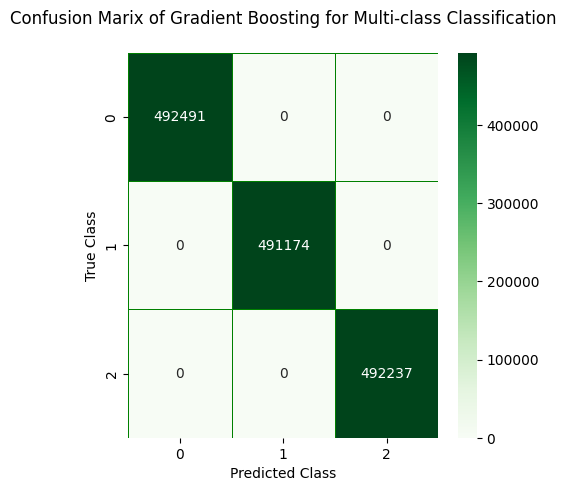

In [100]:
mul_gb_cm = confusion_matrix(mul_y_test, mul_y_pred)
cmap = 'Greens'
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(mul_gb_cm, annot = True, linewidth = 0.5, linecolor = "green", fmt = ".0f", ax = ax, cmap = cmap)
plt.title("Confusion Marix of Gradient Boosting for Multi-class Classification\n")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [101]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    gbc_mul =  GradientBoostingClassifier(learning_rate = n*0.1)

    gbc_mul.fit(mul_x_train, mul_y_train)
    # record training set accuracy
    training_accuracy.append(gbc_mul.score(mul_x_train, mul_y_train))
    # record generalization accuracy
    test_accuracy.append(gbc_mul.score(mul_x_test, mul_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    gbc_mul =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    gbc_mul.fit(mul_x_train, mul_y_train)
    # record training set accuracy
    training_accuracy.append(gbc_mul.score(mul_x_train, mul_y_train))
    # record generalization accuracy
    test_accuracy.append(gbc_mul.score(mul_x_test, mul_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [ ]:
# storing the results. The below mentioned order of parameter passing is important.

storeResults_mul('Gradient Boosting', acc_mul_gb_model_pred)

# 7.3. Neural Networks: Mullti-layer Perceptron
Binary Classification

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
bi_neural_net_model = MLPClassifier(hidden_layer_sizes = (100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    random_state=42
    ) 
bi_neural_net_model = bi_neural_net_model.fit(bi_x_train, bi_y_train)

In [ ]:
# Save the model to a file
with open('./Models/Binary_Classification/neural_net_model.pkl', 'wb') as f:
    pickle.dump(bi_neural_net_model, f)

# Load the model from the file
with open('./Models/Binary_Classification/neural_net_model.pkl', 'rb') as f:
    loaded_bi_neural_net_model = pickle.load(f)

In [ ]:
# predicting the target value from the model for the samples

bi_x_train_pred = loaded_bi_neural_net_model.predict(bi_x_train)
bi_y_pred = loaded_bi_neural_net_model.predict(bi_x_test)

In [ ]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_bi_neural_net_model_train = metrics.accuracy_score(bi_y_train, bi_x_train_pred)
acc_bi_neural_net_model_pred = metrics.accuracy_score(bi_y_test, bi_y_pred)
print("Neural Network : Accuracy on training Data for Binary Classification: {:.3f}%".format(acc_bi_neural_net_model_train * 100))
print("Neural Network : Accuracy on test Data for Binary Classification: {:.3f}%".format(acc_bi_neural_net_model_pred * 100))
print()

f1_score_bi_neural_net_model_train = metrics.f1_score(bi_y_train, bi_x_train_pred)
f1_score_bi_neural_net_model_pred = metrics.f1_score(bi_y_test, bi_y_pred)
print("Neural Network : f1_score on training Data for Binary Classification: {:.3f}%".format(f1_score_bi_neural_net_model_train * 100))
print("Neural Network : f1_score on test Data for Binary Classification: {:.3f}%".format(f1_score_bi_neural_net_model_pred * 100))
print()

recall_score_bi_neural_net_model_train = metrics.recall_score(bi_y_train, bi_x_train_pred)
recall_score_bi_neural_net_model_pred = metrics.recall_score(bi_y_test, bi_y_pred)
print("Neural Network : Recall on training Data for Binary Classification: {:.3f}%".format(recall_score_bi_neural_net_model_train  * 100))
print("Neural Network : Recall on test Data for Binary Classification: {:.3f}%".format(recall_score_bi_neural_net_model_pred * 100))
print()

precision_score_bi_neural_net_model_train = metrics.precision_score(bi_y_train, bi_x_train_pred)
precision_score_bi_neural_net_model_pred = metrics.precision_score(bi_y_test, bi_y_pred)
print("Neural Network : precision on training Data for Binary Classification: {:.3f}%".format(precision_score_bi_neural_net_model_train * 100))
print("Neural Network : precision on test Data for Binary Classification: {:.3f}%".format(precision_score_bi_neural_net_model_pred * 100))

Neural Network : Accuracy on training Data for Binary Classification: 98.471%
Neural Network : Accuracy on test Data for Binary Classification: 98.444%

Neural Network : f1_score on training Data for Binary Classification: 98.447%
Neural Network : f1_score on test Data for Binary Classification: 98.419%

Neural Network : Recall on training Data for Binary Classification: 96.941%
Neural Network : Recall on test Data for Binary Classification: 96.888%

Neural Network : precision on training Data for Binary Classification: 100.000%
Neural Network : precision on test Data for Binary Classification: 100.000%


In [ ]:
print(classification_report(bi_y_test, bi_y_pred, target_names = binary_labels))

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.98    573799
      normal       1.00      0.97      0.98    574048

    accuracy                           0.98   1147847
   macro avg       0.98      0.98      0.98   1147847
weighted avg       0.98      0.98      0.98   1147847



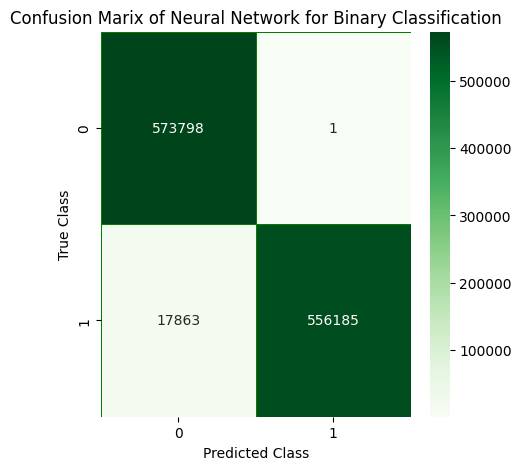

In [ ]:
bi_neural_net_cm = confusion_matrix(bi_y_test, bi_y_pred)
cmap = 'Greens'
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(bi_neural_net_cm, annot = True, linewidth = 0.5, linecolor = "green", fmt = ".0f", ax = ax, cmap = cmap)
plt.title("Confusion Marix of Neural Network for Binary Classification")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 20)
for n in depth:
    neural_net_test_bi = MLPClassifier(hidden_layer_sizes = n) 

    neural_net_test_bi = neural_net_test_bi.fit(bi_x_train, bi_y_train)
    
    # record training set accuracy
    training_accuracy.append(neural_net_test_bi.score(bi_x_train, bi_y_train))
    
    # record generalization accuracy
    test_accuracy.append(neural_net_test_bi.score(bi_x_test, bi_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label = "training accuracy")
plt.plot(depth, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("hidden_layer_sizes")
plt.legend();

In [ ]:
# storing the results. The below mentioned order of parameter passing is important.

storeResults_bi('Neural Network', acc_bi_neural_net_model_pred, f1_score_bi_neural_net_model_pred,
            recall_score_bi_neural_net_model_pred, precision_score_bi_neural_net_model_pred) 

Multi-class Classification

In [ ]:
mul_neural_net_model = MLPClassifier(hidden_layer_sizes = (100, 50),
    activation='relu',
    solver = 'sgu',
    alpha = 0.0001,
    batch_size = 'auto',
    learning_rate = 'constant',
    learning_rate_init=0.1,
    max_iter = 200,
    random_state = 42
) 
mul_neural_net_model = mul_neural_net_model.fit(mul_x_train, mul_y_train)

In [ ]:
# Save the model to a file
with open('./Models/Multi-class_Classification/neural_net_model.pkl', 'wb') as f:
    pickle.dump(mul_neural_net_model, f)

# Load the model from the file
with open('./Models/Multi-class_Classification/neural_net_model.pkl', 'rb') as f:
    loaded_mul_neural_net_model = pickle.load(f)

In [ ]:
# predicting the target value from the model for the samples

mul_x_train_pred = loaded_mul_neural_net_model.predict(mul_x_train)
mul_y_pred = loaded_mul_neural_net_model.predict(mul_x_test)

In [ ]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_mul_neural_net_model_train = metrics.accuracy_score(mul_y_train, mul_x_train_pred)
acc_mul_neural_net_model_pred = metrics.accuracy_score(mul_y_test, mul_y_pred)
print("Neural Network : Accuracy on training Data for Multi-class Classification: {:.3f}%".format(acc_mul_neural_net_model_train * 100))
print("Neural Network : Accuracy on test Data for Multi-class Classification: {:.3f}%".format(acc_mul_neural_net_model_pred * 100))

Neural Network : Accuracy on training Data for Multi-class Classification: 33.323%
Neural Network : Accuracy on test Data for Multi-class Classification: 33.374%


In [ ]:
print(classification_report(mul_y_test, mul_y_pred, target_names = multi_class_labels))

c:\Users\Elitebook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Elitebook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      gafgyt       0.33      1.00      0.50    492491
       mirai       1.00      0.00      0.00    491174
      Normal       0.00      0.00      0.00    492237

    accuracy                           0.33   1475902
   macro avg       0.44      0.33      0.17   1475902
weighted avg       0.44      0.33      0.17   1475902



c:\Users\Elitebook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


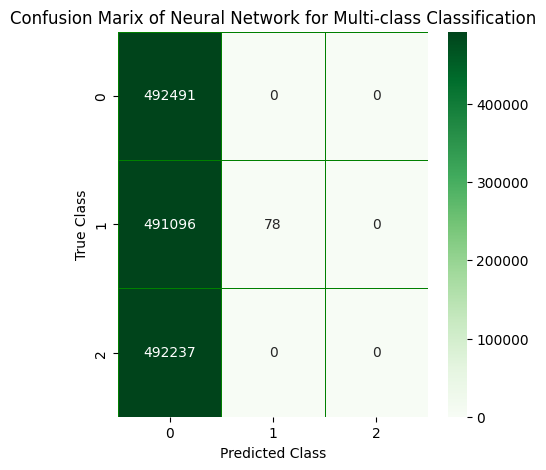

In [ ]:
mul_neural_net_cm = confusion_matrix(mul_y_test, mul_y_pred)
cmap = 'Greens'
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(mul_neural_net_cm, annot = True, linewidth = 0.5, linecolor = "green", fmt = ".0f", ax = ax, cmap = cmap)
plt.title("Confusion Marix of Neural Network for Multi-class Classification")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 20)
for n in depth:
    neural_net_test_mul = MLPClassifier(hidden_layer_sizes = n) 

    neural_net_test_mul  = neural_net_test_mul.fit(mul_x_train, mul_y_train)
    
    # record training set accuracy
    training_accuracy.append(neural_net_test_mul.score(mul_x_train, mul_y_train))
    
    # record generalization accuracy
    test_accuracy.append(neural_net_test_mul.score(mul_x_test, mul_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label = "training accuracy")
plt.plot(depth, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("hidden_layer_sizes")
plt.legend();

In [ ]:
# storing the results. The below mentioned order of parameter passing is important.

storeResults_mul('Neural Network', acc_mul_neural_net_model_pred) 

# 7.4. K-Nearest Neighbor: Classifier
Binary Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
bi_knn_model = KNeighborsClassifier(n_neighbors = 3,
    weights = 'distance',               
    leaf_size = 20,             
    p = 2,                   
    metric = 'euclidean'
)
bi_knn_model = bi_knn_model.fit(bi_x_train, bi_y_train)

In [ ]:
# Save the model to a file
with open('./Models/Binary_Classification/knn_model.pkl', 'wb') as f:
    pickle.dump(bi_knn_model, f)

# Load the model from the file
with open('./Models/Binary_Classification/knn_model.pkl', 'rb') as f:
    loaded_bi_knn_model = pickle.load(f)

In [ ]:
# predicting the target value from the model for the samples

bi_x_train_pred = loaded_bi_knn_model.predict(bi_x_train)
bi_y_pred = loaded_bi_knn_model.predict(bi_x_test)

In [ ]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_bi_knn_model_train = metrics.accuracy_score(bi_y_train, bi_x_train_pred)
acc_bi_knn_model_pred = metrics.accuracy_score(bi_y_test, bi_y_pred)
print("K-Nearest Neighbor Classifier : Accuracy on training Data for Binary Classification: {:.3f}%".format(acc_bi_knn_model_train * 100))
print("K-Nearest Neighbor Classifier : Accuracy on test Data for Binary Classification: {:.3f}%".format(acc_bi_knn_model_pred * 100))
print()

f1_score_bi_knn_model_train = metrics.f1_score(bi_y_train, bi_x_train_pred)
f1_score_bi_knn_model_pred = metrics.f1_score(bi_y_test, bi_y_pred)
print("K-Nearest Neighbor Classifier : f1_score on training Data for Binary Classification: {:.3f}%".format(f1_score_bi_knn_model_train * 100))
print("K-Nearest Neighbor Classifier : f1_score on test Data for Binary Classification: {:.3f}%".format(f1_score_bi_knn_model_pred * 100))
print()

recall_score_bi_knn_model_train = metrics.recall_score(bi_y_train, bi_x_train_pred)
recall_score_bi_knn_model_pred = metrics.recall_score(bi_y_test, bi_y_pred)
print("K-Nearest Neighbor Classifier : Recall on training Data for Binary Classification: {:.3f}%".format(recall_score_bin_knn_model_train  * 100))
print("K-Nearest Neighbor Classifier : Recall on test Data for Binary Classification: {:.3f}%".format(recall_score_bin_knn_model_pred * 100))
print()

precision_score_bi_knn_model_train = metrics.precision_score(bi_y_train, bi_x_train_pred)
precision_score_bi_knn_model_pred = metrics.precision_score(bi_y_test, bi_y_pred)
print("K-Nearest Neighbor Classifier : precision on training Data for Binary Classification: {:.3f}%".format(precision_score_bi_knn_model_train * 100))
print("K-Nearest Neighbor Classifier : precision on test Data for Binary Classification: {:.3f}%".format(precision_score_bi_knn_model_pred * 100))

In [ ]:
print(classification_report(bi_y_test, bi_y_pred, target_names = binary_labels))

In [ ]:
bi_knn_cm = confusion_matrix(bi_y_test, bi_y_pred)
cmap = 'Greens'
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(bi_knn_cm, annot = True, linewidth = 0.5, linecolor = "green", fmt = ".0f", ax = ax, cmap = cmap)
plt.title("Confusion Marix of K Nearest Neighbors for Binary Classification")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 20)
for n in depth:
    knn_bi = KNeighborsClassifier(n_neighbors = n)

    knn_bi.fit(bi_x_train, bi_y_train)
    # record training set accuracy
    training_accuracy.append(knn_bi.score(bi_x_train, bi_y_train))
    # record generalization accuracy
    test_accuracy.append( knn_bi.score(bi_x_test, bi_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label = "training accuracy")
plt.plot(depth, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [ ]:
# storing the results. The below mentioned order of parameter passing is important.

storeResults_bi('K-Nearest Neighbors', acc_bi_knn_model_pred, f1_score_bi_knn_model_pred,
            recall_score_bi_knn_model_train, precision_score_bi_knn_model_train)

Multi-class Classification

In [ ]:
mul_knn_model = KNeighborsClassifier(n_neighbors = 3
    weights = 'distance',          
    leaf_size = 20,             
    p = 2,                   
    metric = 'euclidean'
)
mul_knn_model = mul_knn_model.fit(mul_x_train, mul_y_train)

In [ ]:
# Save the model to a file
with open('./Models/Multi-class_Classification/knn_model.pkl', 'wb') as f:
    pickle.dump(mul_knn_model, f)

# Load the model from the file
with open('./Models/Multi-class_Classification/knn_model.pkl', 'rb') as f:
    loaded_mul_knn_model = pickle.load(f)

In [ ]:
# predicting the target value from the model for the samples

mul_x_train_pred = loaded_mul_knn_model.predict(mul_x_train)
mul_y_pred = loaded_mul_knn_model.predict(mul_x_test)

In [ ]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_mul_knn_model_train = metrics.accuracy_score(mul_y_train, mul_x_train_pred)
acc_mul_knn_model_pred = metrics.accuracy_score(mul_y_test, mul_y_pred)
print("K-Nearest Neighbor Classifier : Accuracy on training Data for Multi-class Classification: {:.3f}%".format(acc_mul_knn_model_train * 100))
print("K-Nearest Neighbor Classifier : Accuracy on test Data for Multi-class Classification: {:.3f}%".format(acc_mul_knn_model_pred * 100))

In [ ]:
print(classification_report(mul_y_test, mul_y_pred, target_names = multi_class_labels))

In [ ]:
mul_knn_cm = confusion_matrix(mul_y_test, mul_y_pred)
cmap = 'Greens'
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(mul_knn_cm, annot = True, linewidth = 0.5, linecolor = "green", fmt = ".0f", ax = ax, cmap = cmap)
plt.title("Confusion Marix of K Nearest Neighbors of Multi-class Classification")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 20)
for n in depth:
    knn_mul = KNeighborsClassifier(n_neighbors = n)

    knn_mul.fit(mul_x_train, mul_y_train)
    # record training set accuracy
    training_accuracy.append(knn_mul.score(mul_x_train, mul_y_train))
    # record generalization accuracy
    test_accuracy.append( knn_mul.score(mul_x_test, mul_y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label = "training accuracy")
plt.plot(depth, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [ ]:
# storing the results. The below mentioned order of parameter passing is important.

storeResults_bi('K-Nearest Neighbors', acc_mul_knn_model_pred)

# 8. Comparision of Model

Comparison of Models for Binary classification

In [ ]:
# creating dataframe
result_bi = pd.DataFrame({ 'ML Model' : ML_Model_bi,
                        'Accuracy' : accuracy_bi,
                        'f1_score' : f1_score_bi,
                        'Recall'   : recall_bi,
                        'Precision': precision_bi,
                      })

In [ ]:
# dispalying total result
result_bi

In [ ]:
#Sorting the dataframe on accuracy
sorted_result_bi = result_bi.sort_values(by = ['Accuracy', 'f1_score'],ascending = False).reset_index(drop = True)

In [ ]:
# dispalying total result
sorted_result_bi

In [ ]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# n_features = bin_x_train.shape[1]
# plt.barh(range(n_features), gbc.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), bin_x_train.columns)
# plt.title("Feature importances using permutation on full model")
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

Comparison of Model for Multi-class Classification

In [ ]:
# creating dataframe
result_mul = pd.DataFrame({ 'ML Model' : ML_Model_mul,
                        'Accuracy' : accuracy_mul,
                      })

In [ ]:
# dispalying total result
result_mul

In [ ]:
#Sorting the datafram on accuracy
sorted_result_mul = result_mul.sort_values(by = ['Accuracy', 'f1_score'],ascending = False).reset_index(drop = True)

In [ ]:
# dispalying total result
sorted_result_mul

In [ ]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# n_features = bin_x_train.shape[1]
# plt.barh(range(n_features), gbc.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), bin_x_train.columns)
# plt.title("Feature importances using permutation on full model")
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

# 9. Conclusion